In [ ]:
import cianparser
import time
import pandas as pd

def save_data_to_csv(data, filename="cianparser_ol.csv", mode="a"):
    """Функция записи данных в CSV-файл.

    Args:
        data (list): Список словарей с данными.
        filename (str, optional): Имя файла. Defaults to "cianparser_ol.csv".
        mode (str, optional): Режим записи. Defaults to "a" (append).
    """
    if data:  # Проверяем, не пуст ли список data
        df = pd.DataFrame(data)  # Создаем DataFrame
        df.to_csv(filename, index=False, header=False, mode=mode)

# Создаем парсер для обоих регионов
parser = cianparser.CianParser(location="Москва и Московская область")

# Записываем заголовки в файл (первая строка)
headers = parser.get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=False, additional_settings={"start_page":1, "end_page":1})[0].keys()
save_data_to_csv(list(headers), filename="cianparser_ol.csv", mode="w")  # Записываем заголовки

# Парсим данные по 900 страницам
for page in range(1, 900):
    time.sleep(40)
    page_data = parser.get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=False, additional_settings={"start_page":page, "end_page":page})
    if page_data:  # Проверяем, не пуст ли список page_data
        save_data_to_csv(page_data, filename="cianparser_ol.csv")

print("Данные успешно сохранены в файл cian_parser.csv")

In [ ]:
def remove_duplicates(cian_parser.csv):
  """Удаляет повторяющиеся строки из файла.

  Args:
    filename: Имя файла.
  """

  with open(filename, 'r') as file:
    lines = file.readlines()

  unique_lines = set(lines)  # Создаем множество для удаления дубликатов

  with open(filename, 'w') as file:
    for line in unique_lines:
      file.write(line)

# Пример использования:
filename = 'cian_parser.csv'  # Замените 'input.txt' на имя вашего файла
remove_duplicates(filename)

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def check_and_handle_data(df):
    """
    Проверка данных на пропуски, выбросы и ошибки, обработка аномалий.

    Args:
        df (pd.DataFrame): DataFrame с данными.

    Returns:
        pd.DataFrame: DataFrame с обработанными данными.
    """

    # 1. Проверка на пропуски:
    print("Пропуски в данных:")
    print(df.isnull().sum())  # Вывод количества пропусков по столбцам

    # Заполнение пропусков (в зависимости от типа данных):
    # - Числовые столбцы: средним значением или медианой
    for col in df.select_dtypes(include=np.number):
        df[col].fillna(df[col].mean(), inplace=True)  # Замена пропусков средним
    # - Текстовые столбцы: "Unknown" или другим подходящим значением
    for col in df.select_dtypes(include=object):
        df[col].fillna("Unknown", inplace=True)

    # 2. Проверка на выбросы:
    print("\nПроверка на выбросы:")
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"Выбросы в '{col}':")
        print(f"  Нижняя граница: {lower_bound}")
        print(f"  Верхняя граница: {upper_bound}")
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Удаление выбросов

    # 3. Проверка на ошибки:
    #  - Проверка типа данных:
    #     - Преобразование в нужный тип данных, если это возможно (например, "Номер телефона" в числовой)
    #     - Проверка значений на соответствие ограничениям (например, "Количество комнат" > 0)
    #  - Проверка на дубликаты:
    #     - Удаление дубликатов, если они есть
    #  - Проверка на некорректные значения:
    #     - Замена некорректных значений на "Unknown" или на значение по умолчанию
    #  - Проверка на логические ошибки:
    #     - Проверка на несоответствие значений в разных столбцах (например, "Площадь" < "Количество комнат")

    # ... (Добавьте свою логику проверки и обработки ошибок)

    print("\nДанные проверены и обработаны.")
    return df

# Пример использования:
df = pd.read_csv(".csv")
df = check_and_handle_data(df)

In [ ]:
import pandas as pd

# Загружаем данные из CSV-файла, игнорируя некорректные строки
df = pd.read_csv('cian_parsing.csv', header=None, names=[
    "Компания", "Тип", "Город", "Тип сделки", "Тип объекта", "Этажность", "Количество комнат", "Площадь (кв.м)",
    "Цена (руб.)", "Район", "Улица", "Дом", "Станция метро", "ЖК"
], sep=",", on_bad_lines='warn')
df['Цена (руб.)'] = df['Цена (руб.)'].apply(lambda x: '{:,.0f}'.format(x))

# Выводим DataFrame в виде таблицы
print(df.to_string())

<ipython-input-2-18a760b072a0>:6: ParserWarning: Skipping line 9420: expected 14 fields, saw 27
Skipping line 9430: expected 14 fields, saw 27

  df = pd.read_csv('cian_parsing.csv', header=None, names=[


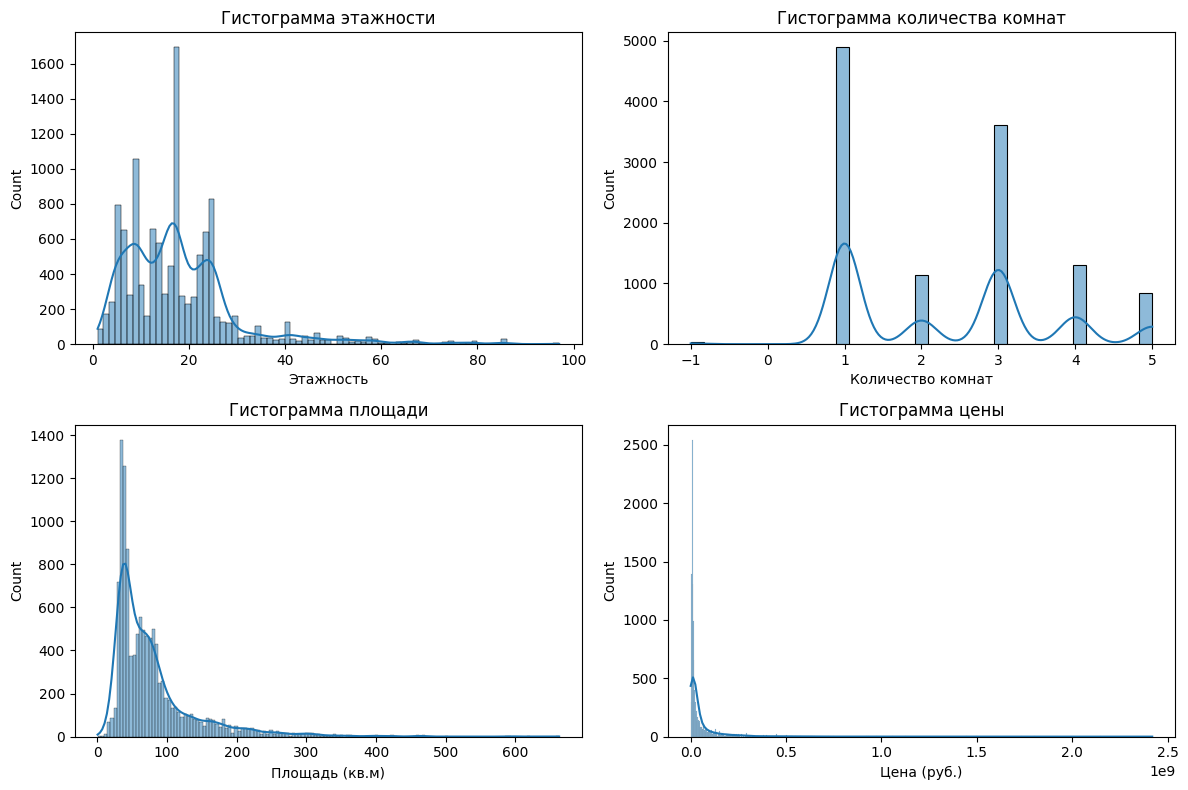

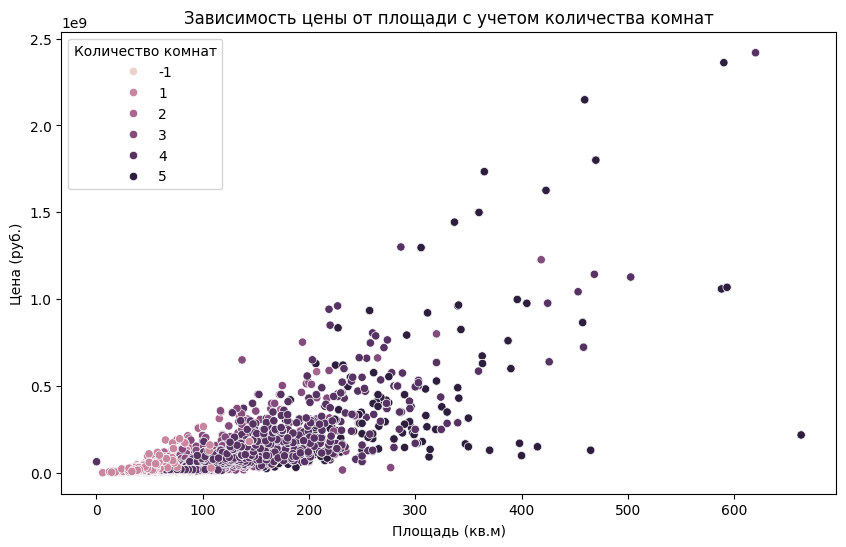

<ipython-input-2-18a760b072a0>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Площадь (кв.м)'], shade=True)


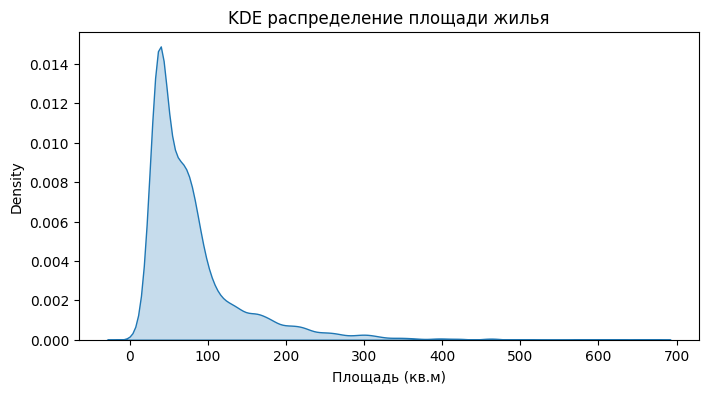

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные из CSV-файла
df = pd.read_csv('cian_parsing.csv', header=None, names=[
    "Компания", "Тип", "Город", "Тип сделки", "Тип объекта", "Этажность", "Количество комнат", "Площадь (кв.м)",
    "Цена (руб.)", "Район", "Улица", "Дом", "Станция метро", "ЖК"
], sep=",", on_bad_lines='warn')


# Преобразуем столбцы в числовые типы
df['Этажность'] = df['Этажность'].astype(int)
df['Количество комнат'] = df['Количество комнат'].astype(int)
df['Площадь (кв.м)'] = df['Площадь (кв.м)'].astype(float)
df['Цена (руб.)'] = df['Цена (руб.)'].astype(float)

# Гистограммы числовых признаков
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Этажность'], kde=True)
plt.title('Гистограмма этажности')

plt.subplot(2, 2, 2)
sns.histplot(df['Количество комнат'], kde=True)
plt.title('Гистограмма количества комнат')

plt.subplot(2, 2, 3)
sns.histplot(df['Площадь (кв.м)'], kde=True)
plt.title('Гистограмма площади')

plt.subplot(2, 2, 4)
sns.histplot(df['Цена (руб.)'], kde=True)
plt.title('Гистограмма цены')

plt.tight_layout()
plt.show()

# Зависимость цены от площади с учетом количества комнат
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Площадь (кв.м)', y='Цена (руб.)', hue='Количество комнат', data=df)
plt.title('Зависимость цены от площади с учетом количества комнат')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Цена (руб.)')
plt.show()

# KDE распределение площади жилья
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Площадь (кв.м)'], shade=True)
plt.title('KDE распределение площади жилья')
plt.xlabel('Площадь (кв.м)')
plt.show()